In [1]:
#References
#Graphic styles: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

In [20]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#set the style to ggplot (gramar of graphics)
style.use('ggplot')
plt.rcParams['figure.figsize']= (15,10)

In [3]:
#Import the housing data
path = "/Users/pw/Desktop/house_dataset.csv"
house_dataset = pd.read_csv(path, index_col=False)

In [4]:
house_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
sales_data = house_dataset.loc[:,['YearBuilt','RoofStyle','HeatingQC','GrLivArea',
                                  'BedroomAbvGr','GarageType','GarageArea',
                                  'SaleCondition','SalePrice']]

In [6]:
sales_data.dtypes

YearBuilt         int64
RoofStyle        object
HeatingQC        object
GrLivArea         int64
BedroomAbvGr      int64
GarageType       object
GarageArea        int64
SaleCondition    object
SalePrice         int64
dtype: object

In [7]:
#Line chart
#First build a pivot table that calculates the average house price for each build year
year_built_table = pd.pivot_table(sales_data,values='SalePrice',index=['YearBuilt'],aggfunc=np.mean)

In [8]:
year_built_table

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
...,...
2006,251775.447761
2007,255362.734694
2008,348849.130435


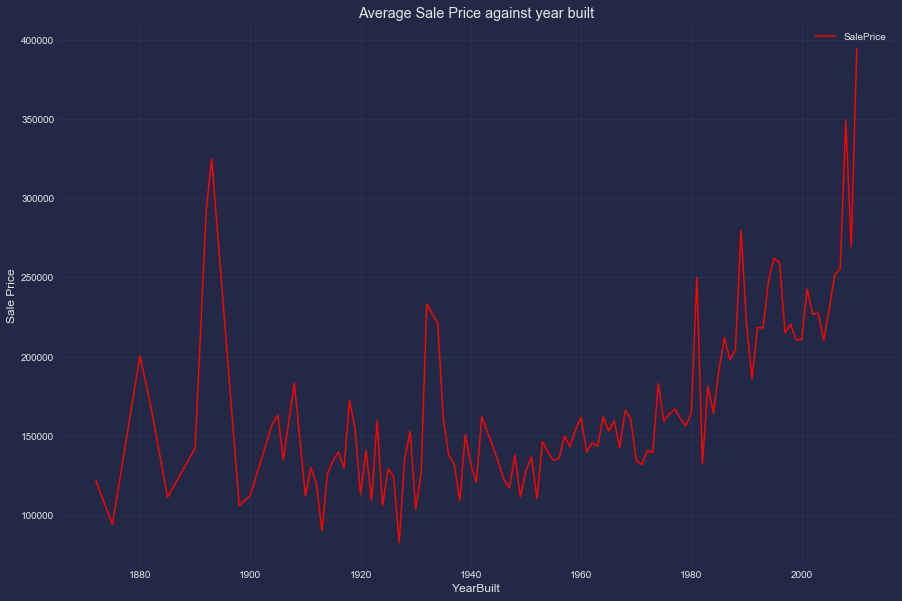

In [26]:
#Line Chart for average house price against the year the house was build
fig1 = year_built_table.plot(kind='line',color='r')
plt.title("Average Sale Price against year built")
plt.ylabel("Sale Price")
plt.savefig('/Users/pw/Desktop/Visualizationp/average_sale_line.png')

plt.show()

In [10]:
#Multiple Line Chart 
#I want to know how prices have been changing over time respect to the type of roof
table2 = pd.pivot_table(sales_data, values = 'SalePrice', columns ='RoofStyle', index =['YearBuilt'], 
                        aggfunc=np.mean, fill_value=0)

In [11]:
table2

RoofStyle,Flat,Gable,Gambrel,Hip,Mansard,Shed
YearBuilt,,,,,,
1872,0,122000.000000,0,0.000000,0,0
1875,0,94000.000000,0,0.000000,0,0
1880,0,178833.333333,0,0.000000,265979,0
1882,0,168000.000000,0,0.000000,0,0
1885,0,122500.000000,0,0.000000,100000,0
...,...,...,...,...,...,...
2006,0,230956.940000,0,313006.352941,0,0
2007,0,243517.882353,0,282211.066667,0,0
2008,0,284890.454545,0,407477.916667,0,0


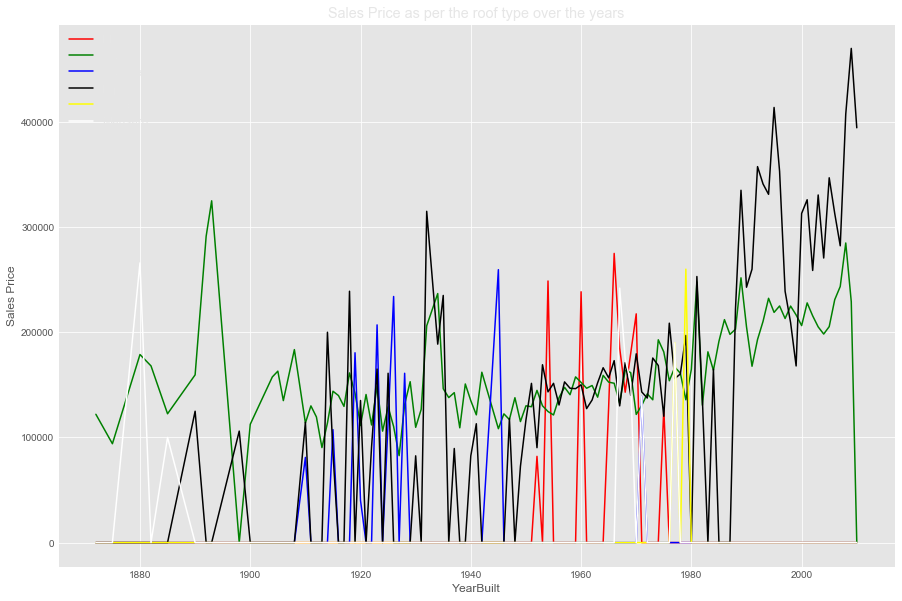

In [23]:
table2['Flat'].plot(kind='line', color='r', label ='Flat')
table2['Gable'].plot(kind='line', color='g', label ='Gable')
table2['Gambrel'].plot(kind = 'line', color = 'blue',label ='Gambrel')
table2['Hip'].plot(kind='line', color ='black', label='Hip')
table2['Shed'].plot(kind='line', color ='yellow', label='Shed')
table2['Mansard'].plot(kind='line', color ='white', label='Mansard')
plt.title("Sales Price as per the roof type over the years")
plt.ylabel('Sales Price')
plt.savefig('/Users/pw/Desktop/Visualizationp/cyber_line.png')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

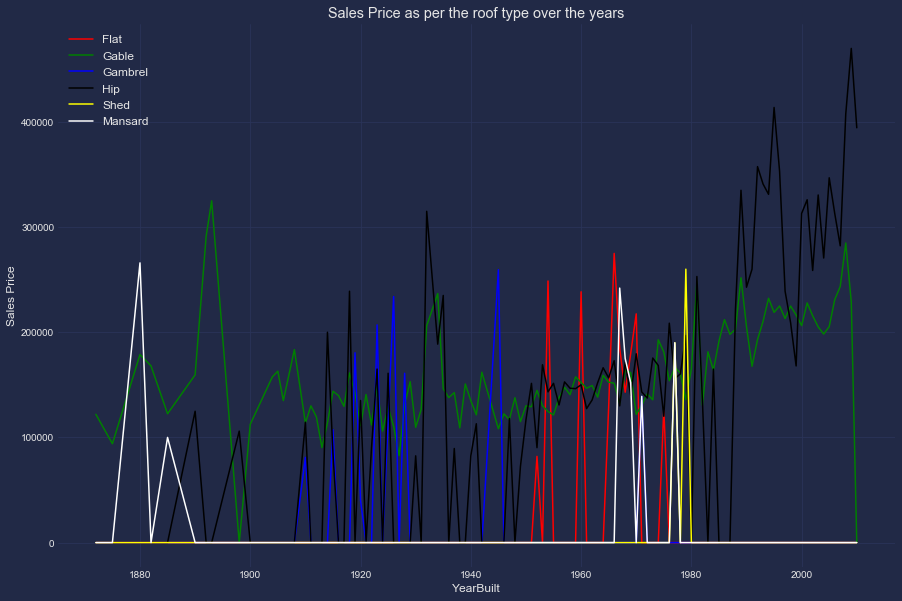

In [24]:
#Using cyberpunk to reproduce the line charts
import mplcyberpunk
style.use('cyberpunk')

table2['Flat'].plot(kind='line', color='r', label ='Flat')
table2['Gable'].plot(kind='line', color='g', label ='Gable')
table2['Gambrel'].plot(kind = 'line', color = 'blue',label ='Gambrel')
table2['Hip'].plot(kind='line', color ='black', label='Hip')
table2['Shed'].plot(kind='line', color ='yellow', label='Shed')
table2['Mansard'].plot(kind='line', color ='white', label='Mansard')
plt.title("Sales Price as per the roof type over the years")
plt.ylabel('Sales Price')
plt.savefig('/Users/pw/Desktop/Visualizationp/cyber_line.png')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()
